# Unitary Fermion Gas in BCC lattice

* Compute g.s. energy of fermions in unitary limit coupling strength.
* N=66 nucleons in one flavor with two spin states are placed in the BCC lattice 
  in cubic boundary with length L 

## Import/Read

In [1]:
from __future__ import print_function
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import *
from scipy import optimize 
import myutil
import glob

### Read results 
Results are read from external files and stored as a dictionary

* result_free  : energy for N=66 fermion without interaction (using MATLAB )
* result_cubic : results from Longzeng for cubic lattice.
* result_bcc   : energy for N=66 fermion with interaction in Unitary limit
*  keys= L or (L, Lto)
*  'L' : lattice size
*  'Lto' : Lt_outer
*  'Lt'  :Lt_inner
*  'beta_fin' : ratio with energy of free particles
*  'beta_therm': ratio with energy from thermodynamic expression
*  'EH0'   : Hamiltonian energy 
*  'EM0'   : Transfer energy 
*  'FG'    : Thermodynamic expression 

In [2]:
# read results from cubic lattice 
out_cubic = myutil.read_fresco_res('02_Cubic.dat')
for key in out_cubic.keys():
    out_cubic[key]=np.array(out_cubic[key])

# dictionary for cubic lattice results 
result_cubic={}
for n in [0,1,2,3,4,5,6]:
    result_cubic[n+5] = {}
    result_cubic[n+5]['L'] = n+5
    result_cubic[n+5]['Lt'] = out_cubic[2*n][:,0]
    result_cubic[n+5]['beta_therm'] = out_cubic[2*n][:,1:3]
    result_cubic[n+5]['beta_fin'] = out_cubic[2*n+1][:,1:3]

In [3]:
#read summary_free.dat
result_free={}
out=np.loadtxt('summary_free.dat')
for n in [4,5,6,7,8,9,10,11]:
    result_free[n]={}
    result_free[n]['L']=n
    result_free[n]['exact']=out[n-4,1]
    result_free[n]['EH0']=out[n-4,2]
    result_free[n]['EM0']=out[n-4,3]
    result_free[n]['FG']=out[n-4,4]

In [4]:
# read summary files 
summary_list = glob.glob('summary_L*')
result_bcc={}
for i in summary_list:
    L=int(i[9:11])
    Lto=int(i[14:15])
    out=np.loadtxt(i)
    result_bcc[L,Lto]={}
    result_bcc[L,Lto]['Lt']=out[:,2] 
    result_bcc[L,Lto]['EH0']=out[:,3:5]
    result_bcc[L,Lto]['EM0']=out[:,5:7]
    result_bcc[L,Lto]['ntot']=out[:,7]
    result_bcc[L,Lto]['nprocs']=out[:,8]
    result_bcc[L,Lto]['beta_fin']=result_bcc[L,Lto]['EM0']/result_free[L]['EM0']
    result_bcc[L,Lto]['beta_therm']=result_bcc[L,Lto]['EM0']/result_free[L]['FG']  

In [5]:
# fitting function for large Lt limit
def fit_exp(t,E0,b,eta):
    return E0+b*np.exp(-eta*t)

def print_beta(dictionary,L,Lto,beta):
    """ print contents of a BCC code result
        input dictionary is bcc_result[L,Lto]   
    """
    print('L=%i  Lt_outer=%i'%(L,Lto))
    print('Lt  %s '%(beta))
    for i in range(len(dictionary['Lt'])):
        print('%i  %f   %f'%(dictionary['Lt'][i], 
                         dictionary[beta][i,0], dictionary[beta][i,1]))
    return    

def plot_beta(dictionary,L,Lto,beta,lattice='BCC'):
    """ errorbar plot for Lt dependence 
        
    """
    if lattice=='BCC':
        label='%5s L=%i Lt_outer=%i '%(lattice,L,Lto)
    else :
        label='%5s L=%i           '%(lattice,L)
    plt.errorbar(dictionary['Lt'], 
             dictionary[beta][:,0], yerr=dictionary[beta][:,1]
             ,fmt='o',label = label)
    return 

def fit_beta_Lt(dictionary, L,Lto, beta
                , lattice='BCC', p0=[0.3,0.1,0.01],fit_func=fit_exp
                ,fit_start_index=None,fit_end_index=None
                ,plot=None):
    """ fit Lt_dependence of beta
        and plot 
    """
    if lattice=='BCC':
        label='%5s L=%i Lt_outer=%i'%(lattice, L, Lto)
    else:
        label='%5s L=%i           '%(lattice, L)
        
    params, p_covariance = optimize.curve_fit(fit_func, dictionary['Lt'][fit_start_index:fit_end_index]
                                          , dictionary[beta][fit_start_index:fit_end_index,0]
                                          , sigma=dictionary[beta][fit_start_index:fit_end_index,1]
                                          , p0 = p0)
    
    print(label+' %8s E0=%f +/- %f   b=%f  eta=%f  '%(
                   beta, params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] ) )
    if plot:
        xx = np.arange(0,1000,10)
        ff = fit_func(xx,*params)
        plt.errorbar(dictionary['Lt']
             ,dictionary[beta][:,0]
             ,yerr=dictionary[beta][:,1]
                 ,fmt='.', label=label     )
        plt.plot(xx,ff,label=label  )            
    return [params[0], np.sqrt(p_covariance[0,0]),params[1],params[2]]

# storage for fitted results  
result_bcc['fit']={}
result_bcc['fit']['beta_fin']={}
result_bcc['fit']['beta_therm']={}

## Plot results L=4

No cubic lattice result is available for L=4

L=4  Lt_outer=0
Lt  beta_fin 
100  0.369038   0.000073
150  0.335827   0.000105
200  0.324659   0.000119
250  0.322308   0.000128
300  0.321524   0.000152
350  0.321426   0.000155
400  0.321181   0.000147
500  0.321230   0.000138
600  0.320789   0.000246
L=4  Lt_outer=5
Lt  beta_fin 
100  0.323924   0.000216
200  0.320202   0.000293
300  0.320691   0.000192
400  0.320740   0.000196
500  0.319271   0.000254
600  0.319320   0.000284
700  0.320104   0.000215


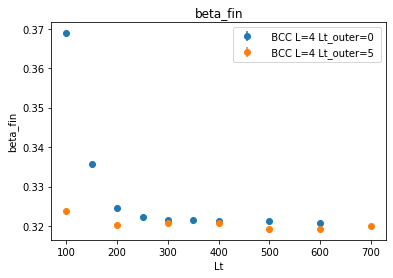

In [6]:
L=4;
# print table 
for Lto in [0,5]: 
    print_beta(result_bcc[L,Lto],L,Lto,'beta_fin')

# plot
plt.figure()
for Lto in [0,5]: 
    plot_beta(result_bcc[L,Lto],L,Lto,'beta_fin')
plt.title('beta_fin')
plt.xlabel('Lt');
plt.ylabel('beta_fin')
plt.legend()  ;

## Fitting L=4 results

  BCC L=4 Lt_outer=0 beta_fin E0=0.321030 +/- 0.000200   b=0.529840  eta=0.024007  
  BCC L=4 Lt_outer=5 beta_fin E0=0.320199 +/- 0.000302   b=1.542002  eta=0.060256  
  BCC L=4 Lt_outer=0 beta_therm E0=0.318132 +/- 0.000198   b=0.525057  eta=0.024007  
  BCC L=4 Lt_outer=5 beta_therm E0=0.317308 +/- 0.000299   b=1.601604  eta=0.060726  


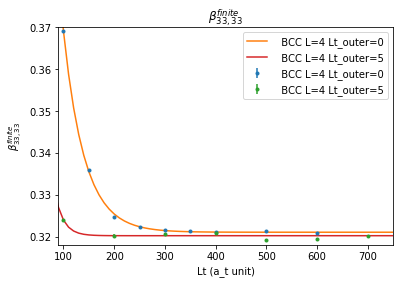

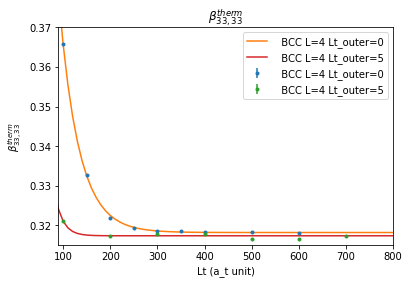

In [7]:
L=4;
# fit and plot for beta_fin

plt.figure()
for Lto in [0,5]:
    result_bcc[L,Lto]['fit']={}        
    for beta in ['beta_fin']:    
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta,plot=True) #store fitting 
plt.ylim([0.318,0.37])
plt.xlim([90,750])
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;        

# fit for beta_therm
plt.figure()
for Lto in [0,5]:      
    for beta in ['beta_therm']:    
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta,plot=True) #store fitting 
plt.ylim([0.315,0.37]);plt.xlim([90,800]);plt.legend()
plt.title(r'$\beta^{therm}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{therm}_{33,33}$') ; 

### Comment
* Lt_outer=5 case seems not fit well in Large Lt. (Oscillating)
* One may choose Lt_outer=0 fitting for large Lt limit. 

## Plot results L=5

L=5  Lt_outer=0
Lt  beta_fin 
100  0.415238   0.000121
200  0.368328   0.000237
300  0.349151   0.000262
400  0.346706   0.000559
500  0.346783   0.000269
600  0.345790   0.000344
L=5  Lt_outer=5
Lt  beta_fin 
100  0.363514   0.000164
200  0.348846   0.000191
300  0.347165   0.000240
400  0.346630   0.000240
500  0.346936   0.000322
600  0.347012   0.000214
700  0.346859   0.000221
800  0.346859   0.000252


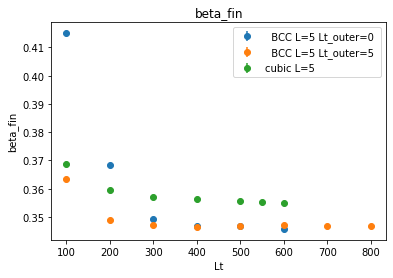

In [8]:
L=5;
# print table 
for Lto in [0,5]: 
    print_beta(result_bcc[L,Lto],L,Lto,'beta_fin')

# plot
plt.figure()
for Lto in [0,5]: 
    plot_beta(result_bcc[L,Lto],L,Lto,'beta_fin')
    
plot_beta(result_cubic[L],L,Lto,'beta_fin',lattice='cubic')

plt.title('beta_fin')
plt.xlabel('Lt');
plt.ylabel('beta_fin')
plt.legend()  ;

## Fitting L=5 results

cubic L=5            beta_fin E0=0.355387 +/- 0.000278   b=0.040926  eta=0.011170  
  BCC L=5 Lt_outer=0 beta_fin E0=0.346364 +/- 0.000325   b=1.350986  eta=0.020596  
  BCC L=5 Lt_outer=5 beta_fin E0=0.346866 +/- 0.000077   b=0.137087  eta=0.021182  
cubic L=5            beta_therm E0=0.333694 +/- 0.000261   b=0.038428  eta=0.011170  
  BCC L=5 Lt_outer=0 beta_therm E0=0.343845 +/- 0.000322   b=1.341158  eta=0.020596  
  BCC L=5 Lt_outer=5 beta_therm E0=0.344343 +/- 0.000076   b=0.136102  eta=0.021182  


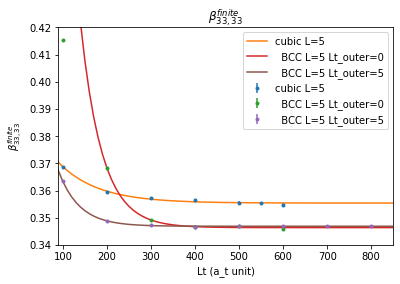

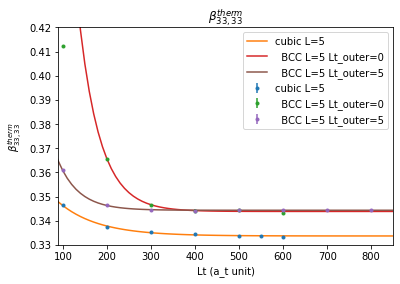

In [9]:
L=5;
# fit and plot for beta_fin
plt.figure()
# fit for cubic 
result_cubic[L]['fit']={}
for beta in ['beta_fin']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        
for Lto in [0,5]:
    result_bcc[L,Lto]['fit']={}        
    for beta in ['beta_fin']:    
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                   ,fit_start_index=1,plot=True) #store fitting 

plt.ylim([0.34,0.42])
plt.xlim([90,850])
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;        

# fit for beta_therm
plt.figure()
for beta in ['beta_therm']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        for Lto in [0,5]:
            result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                       ,fit_start_index=1,plot=True) #store fitting 
plt.ylim([0.33,0.42]);plt.xlim([90,850]);plt.legend()  
plt.title(r'$\beta^{therm}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{therm}_{33,33}$') ; 

### Comment
* BCC Lt_outer=0 result seems to not fit well with Lt=100 point.   
* BCC Lt_outer=5 result seems to fit well including Lt=100 point
* Fitting omitting Lt=100 shows convergence in Lt_outer 
* cubic beta_fin is larger than BCC values. Can we explain/argue this behavior? 

## Plot results L=6

L=6  Lt_outer=0
Lt  beta_fin 
100  0.442854   0.000105
200  0.407500   0.000167
300  0.369629   0.000278
400  0.359559   0.000433
500  0.357370   0.000433
600  0.357370   0.000452
L=6  Lt_outer=5
Lt  beta_fin 
100  0.401480   0.000138
200  0.366673   0.000186
300  0.357589   0.001341
400  0.357370   0.000311
500  0.357041   0.000286
600  0.355837   0.000646
700  0.355618   0.000596
800  0.357041   0.000336


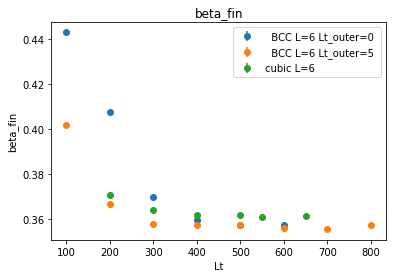

In [10]:
L=6;
# print table 
for Lto in [0,5]: 
    print_beta(result_bcc[L,Lto],L,Lto,'beta_fin')

# plot
plt.figure()
for Lto in [0,5]: 
    plot_beta(result_bcc[L,Lto],L,Lto,'beta_fin')
    
plot_beta(result_cubic[L],L,Lto,'beta_fin',lattice='cubic')

plt.title('beta_fin')
plt.xlabel('Lt');
plt.ylabel('beta_fin')
plt.legend()  ;

## Fitting L=6 results

cubic L=6            beta_fin E0=0.361015 +/- 0.000203   b=0.115004  eta=0.012541  
  BCC L=6 Lt_outer=0 beta_fin E0=0.356733 +/- 0.000331   b=0.797775  eta=0.013772  
  BCC L=6 Lt_outer=5 beta_fin E0=0.356745 +/- 0.000321   b=0.196146  eta=0.014919  
cubic L=6            beta_therm E0=0.350247 +/- 0.000196   b=0.111574  eta=0.012541  
  BCC L=6 Lt_outer=0 beta_therm E0=0.355957 +/- 0.000331   b=0.796040  eta=0.013772  
  BCC L=6 Lt_outer=5 beta_therm E0=0.355970 +/- 0.000321   b=0.195724  eta=0.014919  


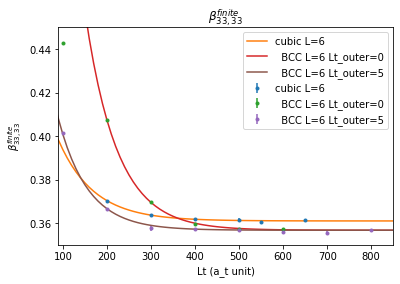

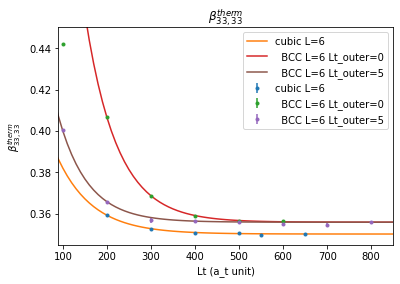

In [11]:
L=6;
plt.figure()
# fit for cubic 
result_cubic[L]['fit']={}
for beta in ['beta_fin']: 
    result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
    # fit and plot for beta_fin
    for Lto in [0,5]:
        result_bcc[L,Lto]['fit']={}        
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                   ,fit_start_index=1,fit_end_index=None
                                                   ,plot=True) #store fitting 
        
plt.ylim([0.35,0.45])
plt.xlim([90,850])
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;        

# fit for beta_therm

plt.figure()
for beta in ['beta_therm']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        for Lto in [0,5]:
            result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                      ,fit_start_index=1,plot=True) #store fitting
plt.ylim([0.345,0.45]);plt.xlim([90,850]);plt.legend()
plt.title(r'$\beta^{therm}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{therm}_{33,33}$') ; 

### Comment
* BCC Lt_outer=0 does not fit well for Lt=100. 
* Thus, fitting is done by excluding Lt=100 values for both Lt_outer=0 and 5.
  Can we explain/argue this? 
* cubic and BCC Lt_outer=5 seems to fit well.  (Note that Lt=100 for Lt_outer=5 is not fitted.) 
* large Lt limit value is larger for cubic lattice than BCC lattice. 
  (Though the difference seems to be smaller than the L=5 case) 

## Plot results L=7

L=7  Lt_outer=0
Lt  beta_fin 
100  0.469162   0.000111
200  0.434035   0.000183
300  0.401140   0.000284
400  0.373306   0.000537
500  0.365714   0.000611
600  0.363631   0.000621
700  0.361844   0.000923
L=7  Lt_outer=5
Lt  beta_fin 
100  0.429272   0.000201
200  0.394888   0.000205
300  0.370775   0.000299
400  0.364821   0.000340
500  0.362589   0.000397
600  0.362886   0.000404
700  0.362886   0.000375
800  0.362291   0.000643


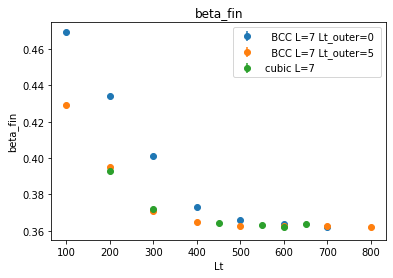

In [12]:
L=7;
# print table 
for Lto in [0,5]: 
    print_beta(result_bcc[L,Lto],L,Lto,'beta_fin')

# plot
plt.figure()
for Lto in [0,5]: 
    plot_beta(result_bcc[L,Lto],L,Lto,'beta_fin')
    
plot_beta(result_cubic[L],L,Lto,'beta_fin',lattice='cubic')

plt.title('beta_fin')
plt.xlabel('Lt');
plt.ylabel('beta_fin')
plt.legend()  ;

## Fitting L=7 results

cubic L=7            beta_fin E0=0.363041 +/- 0.000409   b=0.321857  eta=0.011928  
  BCC L=7 Lt_outer=0 beta_fin E0=0.362424 +/- 0.000449   b=1.692130  eta=0.012592  
  BCC L=7 Lt_outer=5 beta_fin E0=0.362588 +/- 0.000186   b=0.501358  eta=0.013711  
cubic L=7            beta_therm E0=0.356946 +/- 0.000402   b=0.316453  eta=0.011928  
  BCC L=7 Lt_outer=0 beta_therm E0=0.361962 +/- 0.000449   b=1.689973  eta=0.012592  
  BCC L=7 Lt_outer=5 beta_therm E0=0.362125 +/- 0.000185   b=0.500719  eta=0.013711  


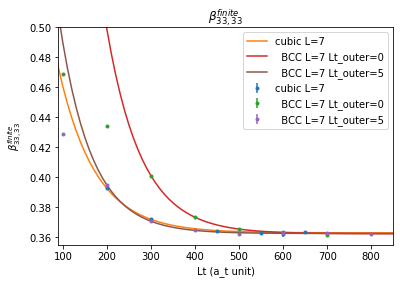

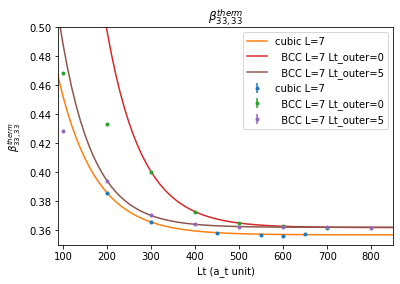

In [13]:
L=7;
plt.figure()
# fit for cubic 
result_cubic[L]['fit']={}
for beta in ['beta_fin']:    
    result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
    # fit and plot for beta_fin
    for Lto in [0]:            
        result_bcc[L,Lto]['fit']={}        
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                   ,fit_start_index=2,fit_end_index=None
                                                   ,plot=True) #store fitting 
    for Lto in [5]:    
        result_bcc[L,Lto]['fit']={}        
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                   ,fit_start_index=1,fit_end_index=None
                                                   ,plot=True) #store fitting 

plt.ylim([0.355,0.5])
plt.xlim([90,850])
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;        

# fit for beta_therm

plt.figure()
for beta in ['beta_therm']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        for Lto in [0]:
            result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                      ,fit_start_index=2,fit_end_index=None
                                                       ,plot=True) #store fitting 
        for Lto in [5]:
            result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                      ,fit_start_index=1,fit_end_index=None
                                                       ,plot=True) #store fitting     
plt.ylim([0.35,0.5]);plt.xlim([90,850]);plt.legend()            
plt.title(r'$\beta^{therm}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{therm}_{33,33}$') ; 

### Comment
* Lt_outer=0 does not fit well at  Lt=100~200. Fitting is done omiiting those. 
* Lt_outer=5 fitting ommited Lt=100. 

## Plot results L=8

L=8  Lt_outer=0
Lt  beta_fin 
100  0.495261   0.000102
150  0.468233   0.000142
200  0.454233   0.000173
250  0.443732   0.000202
350  0.417482   0.000850
450  0.388509   0.001468
550  0.374120   0.001615
600  0.371203   0.001822
700  0.368092   0.000794
L=8  Lt_outer=5
Lt  beta_fin 
100  0.448399   0.000272
150  0.439066   0.000231
200  0.426232   0.000239
250  0.409898   0.000583
300  0.394537   0.000315
350  0.382481   0.000444
400  0.375286   0.000568
500  0.368870   0.000713
550  0.368870   0.000596
600  0.366925   0.000591
650  0.367120   0.000740
700  0.367508   0.000594
800  0.367508   0.000563
900  0.367314   0.001082


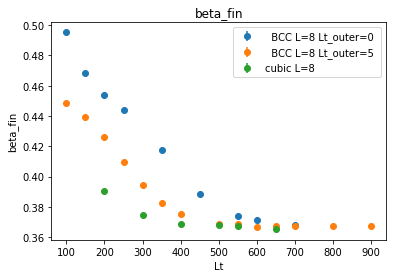

In [14]:
L=8;
# print table 
for Lto in [0,5]: 
    print_beta(result_bcc[L,Lto],L,Lto,'beta_fin')

# plot
plt.figure()
for Lto in [0,5]: 
    plot_beta(result_bcc[L,Lto],L,Lto,'beta_fin')
    
plot_beta(result_cubic[L],L,Lto,'beta_fin',lattice='cubic')

plt.title('beta_fin')
plt.xlabel('Lt');
plt.ylabel('beta_fin')
plt.legend()  ;

## Fitting L=8 results

cubic L=8            beta_fin E0=0.366180 +/- 0.000547   b=0.190014  eta=0.010332  
  BCC L=8 Lt_outer=0 beta_fin E0=0.365094 +/- 0.000774   b=0.966274  eta=0.008326  
  BCC L=8 Lt_outer=5 beta_fin E0=0.366987 +/- 0.000261   b=0.976943  eta=0.011889  
cubic L=8            beta_therm E0=0.362177 +/- 0.000541   b=0.187936  eta=0.010332  
  BCC L=8 Lt_outer=0 beta_therm E0=0.364557 +/- 0.000773   b=0.964854  eta=0.008326  
  BCC L=8 Lt_outer=5 beta_therm E0=0.366448 +/- 0.000261   b=0.975508  eta=0.011889  


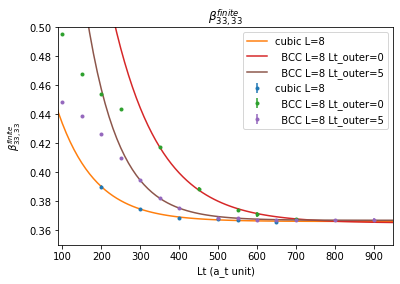

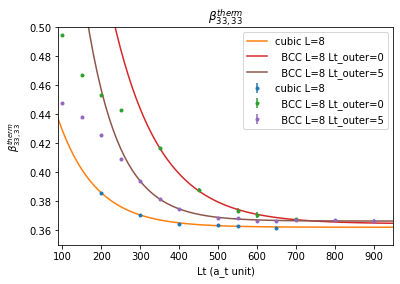

In [15]:
L=8;
plt.figure()
# fit for cubic 
result_cubic[L]['fit']={}
for beta in ['beta_fin']: 
    result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
    # fit and plot for beta_fin
    for Lto in [0,5]:
        result_bcc[L,Lto]['fit']={}        
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                   ,fit_start_index=4,fit_end_index=None
                                                   ,plot=True) #store fitting 
        
plt.ylim([0.35,0.50])
plt.xlim([90,950])
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;        

# fit for beta_therm

plt.figure()
for beta in ['beta_therm']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        for Lto in [0,5]:
            result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                      ,fit_start_index=4,plot=True) #store fitting
plt.ylim([0.35,0.50]);plt.xlim([90,950]);plt.legend()  
plt.title(r'$\beta^{therm}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{therm}_{33,33}$') ; 

### Comment
* Lt_outer=0 case, Lt<=300 seems not fit well. Fitting is done using Lt>300 points 
* Lt_outer=5 case, Lt<=200 seems not fit well. Fitting is done using Lt>=300 points. 

## Plot results L=9

L=9  Lt_outer=0
Lt  beta_fin 
100  0.521221   0.000162
200  0.470995   0.000262
L=9  Lt_outer=5
Lt  beta_fin 
100  0.463608   0.000215
200  0.447605   0.000251
300  0.424708   0.000287
400  0.396886   0.000573
450  0.387530   0.000730
500  0.380883   0.000512
550  0.375959   0.001436
600  0.373989   0.000591
650  0.374974   0.001227
700  0.372265   0.000581
750  0.370296   0.001299
800  0.371527   0.000575
850  0.371527   0.000975


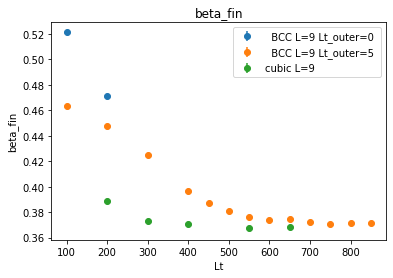

In [16]:
L=9;
# print table 
for Lto in [0,5]: 
    print_beta(result_bcc[L,Lto],L,Lto,'beta_fin')

# plot
plt.figure()
for Lto in [0,5]: 
    plot_beta(result_bcc[L,Lto],L,Lto,'beta_fin')
    
plot_beta(result_cubic[L],L,Lto,'beta_fin',lattice='cubic')

plt.title('beta_fin')
plt.xlabel('Lt');
plt.ylabel('beta_fin')
plt.legend()  ;

cubic L=9            beta_fin E0=0.367786 +/- 0.000759   b=0.255180  eta=0.012562  
  BCC L=9 Lt_outer=5 beta_fin E0=0.369551 +/- 0.000742   b=0.536491  eta=0.007577  
cubic L=9            beta_therm E0=0.364769 +/- 0.000753   b=0.253087  eta=0.012562  
  BCC L=9 Lt_outer=5 beta_therm E0=0.368846 +/- 0.000741   b=0.535468  eta=0.007577  


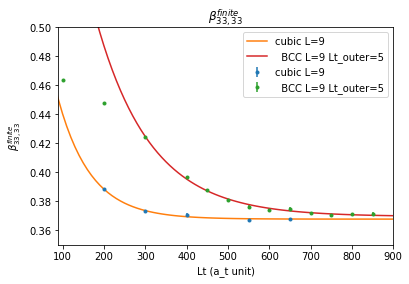

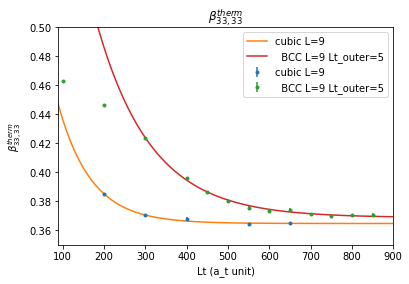

In [17]:
L=9;
plt.figure()
# fit for cubic 
result_cubic[L]['fit']={}
for beta in ['beta_fin']:    
    result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
    # fit and plot for beta_fin
    for Lto in [5]:
        result_bcc[L,Lto]['fit']={}        
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                   ,fit_start_index=2,fit_end_index=None
                                                   ,plot=True) #store fitting 
        
plt.ylim([0.35,0.50])
plt.xlim([90,900])
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;        

# fit for beta_therm

plt.figure()
for beta in ['beta_therm']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        for Lto in [5]:
            result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                      ,fit_start_index=2,fit_end_index=None
                                                    ,plot=True) #store fitting
plt.ylim([0.35,0.50]);plt.xlim([90,900]);plt.legend()  
plt.title(r'$\beta^{therm}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{therm}_{33,33}$') ; 

### Comment
* Lt=100, 200 seems not fit well. Fitting is done omitting those.

## Plot results L=10

L=10  Lt_outer=0
Lt  beta_fin 
100  0.547066   0.000194
200  0.488376   0.000301
300  0.467089   0.000418
L=10  Lt_outer=5
Lt  beta_fin 
100  0.478037   0.000264
200  0.462528   0.000310
300  0.447627   0.000321
400  0.424516   0.000567
450  0.413569   0.000807
500  0.401405   0.000528
550  0.391674   0.001673
600  0.385592   0.000677
650  0.383767   0.001624
700  0.378294   0.000816
750  0.375557   0.001273
850  0.373732   0.000959
900  0.373428   0.001115
950  0.373428   0.001011


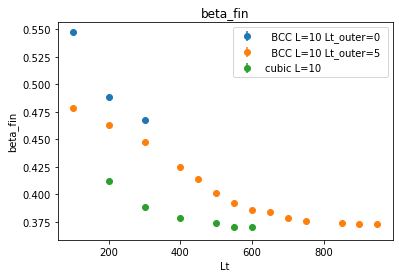

In [18]:
L=10;
# print table 
for Lto in [0,5]: 
    print_beta(result_bcc[L,Lto],L,Lto,'beta_fin')

# plot
plt.figure()
for Lto in [0,5]: 
    plot_beta(result_bcc[L,Lto],L,Lto,'beta_fin')
    
plot_beta(result_cubic[L],L,Lto,'beta_fin',lattice='cubic')

plt.title('beta_fin')
plt.xlabel('Lt');
plt.ylabel('beta_fin')
plt.legend()  ;

cubic L=10            beta_fin E0=0.368627 +/- 0.001101   b=0.192517  eta=0.007456  
  BCC L=10 Lt_outer=5 beta_fin E0=0.369590 +/- 0.001438   b=0.570979  eta=0.005816  
cubic L=10            beta_therm E0=0.366145 +/- 0.001093   b=0.191221  eta=0.007456  
  BCC L=10 Lt_outer=5 beta_therm E0=0.368721 +/- 0.001435   b=0.569638  eta=0.005816  


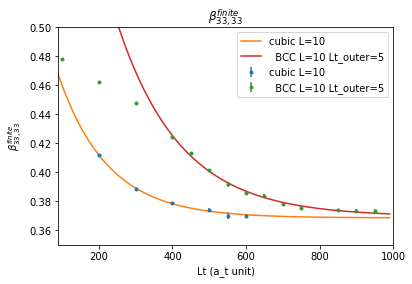

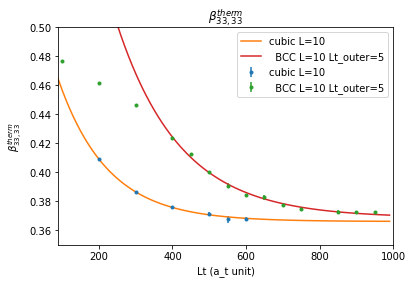

In [19]:
L=10;
plt.figure()
# fit for cubic 
result_cubic[L]['fit']={}
for beta in ['beta_fin']:   
    result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
    # fit and plot for beta_fin
    for Lto in [5]:
        result_bcc[L,Lto]['fit']={}        
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                   ,fit_start_index=3,fit_end_index=None
                                                   ,plot=True) #store fitting 
        
plt.ylim([0.35,0.50])
plt.xlim([90,1000])
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;        

# fit for beta_therm

plt.figure()
for beta in ['beta_therm']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        for Lto in [5]:
            result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                      ,fit_start_index=3,fit_end_index=None
                                                      ,plot=True) #store fitting
plt.ylim([0.35,0.50]);plt.xlim([90,1000]);plt.legend()  
plt.title(r'$\beta^{therm}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{therm}_{33,33}$') ;

### Comment
* Lt<=300 points seems not fit well.
* Fitting is different if using Lt>=400 and Lt>=450 
* Also, fitting is sensitive whether to include the last point or not. 

## Plot results L=11

L=11  Lt_outer=5
Lt  beta_fin 
100  0.491410   0.000306
200  0.475213   0.000375
300  0.462698   0.000486
400  0.448342   0.000593
500  0.429201   0.000892
550  0.417054   0.001362
600  0.404539   0.001695
650  0.398281   0.002056
700  0.387974   0.001067
800  0.383925   0.002366
850  0.378036   0.001999
900  0.374723   0.004590
950  0.379876   0.001382


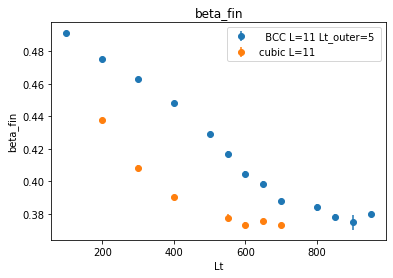

In [20]:
L=11;
# print table 
for Lto in [5]: 
    print_beta(result_bcc[L,Lto],L,Lto,'beta_fin')

# plot
plt.figure()
for Lto in [5]: 
    plot_beta(result_bcc[L,Lto],L,Lto,'beta_fin')
    
plot_beta(result_cubic[L],L,Lto,'beta_fin',lattice='cubic')

plt.title('beta_fin')
plt.xlabel('Lt');
plt.ylabel('beta_fin')
plt.legend()  ;

cubic L=11            beta_fin E0=0.369345 +/- 0.001133   b=0.221085  eta=0.005873  
  BCC L=11 Lt_outer=5 beta_fin E0=0.374651 +/- 0.002806   b=1.345779  eta=0.006389  
cubic L=11            beta_therm E0=0.367158 +/- 0.001126   b=0.219776  eta=0.005873  
  BCC L=11 Lt_outer=5 beta_therm E0=0.373626 +/- 0.002798   b=1.342096  eta=0.006389  


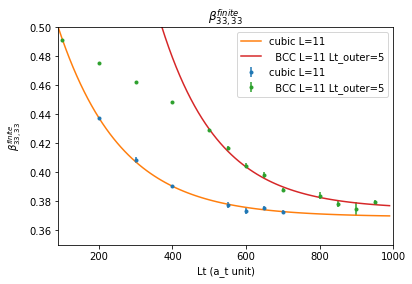

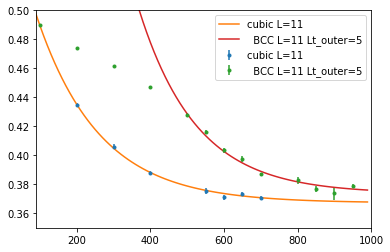

In [21]:
L=11;
plt.figure()
# fit for cubic 
result_cubic[L]['fit']={}
for beta in ['beta_fin']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        
# fit and plot for beta_fin

for Lto in [5]:
    result_bcc[L,Lto]['fit']={}        
    for beta in ['beta_fin']:    
        result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                   ,fit_start_index=4,fit_end_index=None
                                                   ,plot=True) #store fitting 
        
plt.ylim([0.35,0.50])
plt.xlim([90,1000])
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;        

# fit for beta_therm

plt.figure()
for beta in ['beta_therm']:    
        result_cubic[L]['fit'][beta]=fit_beta_Lt(result_cubic[L], L,Lto, beta,lattice='cubic',plot=True)
        for Lto in [5]:
            result_bcc[L,Lto]['fit'][beta]=fit_beta_Lt(result_bcc[L,Lto], L,Lto, beta
                                                      ,fit_start_index=4,fit_end_index=None
                                                      ,plot=True) #store fitting
plt.ylim([0.35,0.50]);plt.xlim([90,1000]);plt.legend()

### Comment
* The large Lt(>=900) results of L=11 seems to be not reliable. 
* Asymptotic value is very sensitive to fit whether to include Lt=400 or the Lt=950.  
* It may be better not use L=11 results because too large uncertainty.

## L dependence of result of fitting

In [22]:
# show large Lt values and store 
print('#L  cubic')
L_cubic=[];beta_fin_cubic=[]; beta_therm_cubic=[];
for L in [5,6,7,8,9,10,11]:
    print(L, result_cubic[L]['fit']['beta_fin'][:2])
    L_cubic.append(L)
    beta_fin_cubic.append(result_cubic[L]['fit']['beta_fin'][:2])
    beta_therm_cubic.append(result_cubic[L]['fit']['beta_therm'][:2] )

print('#L  BCC Lto=5')    
for L in [4,5,6,7,8,9,10,11]:
    Lto=5
    print(L, result_bcc[L,Lto]['fit']['beta_fin'][:2])
print('#L  BCC Lto=0')    
for L in [4,5,6,7,8]:
    Lto=0
    print(L, result_bcc[L,Lto]['fit']['beta_fin'][:2])

#L  cubic
5 [0.35538701446619225, 0.0002778518891388465]
6 [0.3610147797343183, 0.00020251754398100001]
7 [0.3630409123962919, 0.0004091983943136829]
8 [0.36618002373068126, 0.0005474693025089439]
9 [0.36778559433382235, 0.0007590822302707801]
10 [0.36862709210642647, 0.0011009015943391751]
11 [0.3693446971271922, 0.001132882974318013]
#L  BCC Lto=5
4 [0.3201985397550071, 0.0003020479054719305]
5 [0.34686554696453764, 7.65254324897459e-05]
6 [0.35674531552969097, 0.0003212706543358075]
7 [0.36258766213826726, 0.00018556531908596734]
8 [0.36698730680993097, 0.00026145797671962563]
9 [0.36955075860948605, 0.0007422866160350758]
10 [0.3695897258860262, 0.001437994850759103]
11 [0.3746513224228831, 0.002806117469038573]
#L  BCC Lto=0
4 [0.32103041190378256, 0.00019953627626860356]
5 [0.34636448663592057, 0.00032452922253656036]
6 [0.3567325487364076, 0.00033144322019320634]
7 [0.36242379500686434, 0.0004493561707602106]
8 [0.365093597591305, 0.0007736521971104254]


## Select results of fits
* As increasing, the ratio increase except the case of L=9 BCC with Lt_outer=5.
* Lt_outer dependence should be not important. 
  We may choose either results for each L.
  For example, we may choose Lt_outer=0 values for L=4
  and Lt_outer=5 values for other L. 
* L=9 BCC Lt_outer=5 seems to have larger uncertainty. 
* L=11 result may be not reliable. So, let us not use this.   

In [23]:
#Selecting data
L_bcc=[4,5,6,7,8,9,10] # do not use L=11. L=9 too??
beta_fin_bcc=[];beta_therm_bcc=[];        
#L=4 case use Lto=0 results
beta_fin_bcc.append(result_bcc[4,0]['fit']['beta_fin'][:2]) 
beta_therm_bcc.append(result_bcc[4,0]['fit']['beta_therm'][:2]) 
# L>=5 case use Lto=5 results
for L in L_bcc[1:]:
    Lto=5  # L>=5 case, use Lt_outer=5 results 
    if L!=8 :
        beta_fin_bcc.append(result_bcc[L,Lto]['fit']['beta_fin'][:2]) 
        beta_therm_bcc.append(result_bcc[L,Lto]['fit']['beta_therm'][:2]) 
    if L==8 :
        beta_fin_bcc.append(result_bcc[L,Lto]['fit']['beta_fin'][:2]) 
        beta_therm_bcc.append(result_bcc[L,Lto]['fit']['beta_therm'][:2]) 
# convert into array 
L_cubic=np.array(L_cubic)
beta_fin_cubic=np.array(beta_fin_cubic)
beta_therm_cubic=np.array(beta_therm_cubic)
L_bcc=np.array(L_bcc)
beta_fin_bcc=np.array(beta_fin_bcc)
beta_therm_bcc=np.array(beta_therm_bcc)

(0, 1.1)

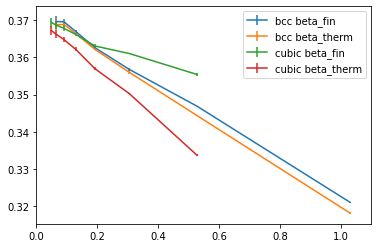

In [24]:
plt.errorbar(66/L_bcc**3, beta_fin_bcc[:,0], yerr=beta_fin_bcc[:,1],label='bcc beta_fin')
plt.errorbar(66/L_bcc**3, beta_therm_bcc[:,0], yerr=beta_therm_bcc[:,1],label='bcc beta_therm')
plt.errorbar(66/L_cubic**3, beta_fin_cubic[:,0], yerr=beta_fin_cubic[:,1],label='cubic beta_fin')
plt.errorbar(66/L_cubic**3, beta_therm_cubic[:,0], yerr=beta_therm_cubic[:,1],label='cubic beta_therm')
plt.legend()
plt.xlim([0,1.1])

Text(0.5, 0, '1/(number of lattice points)')

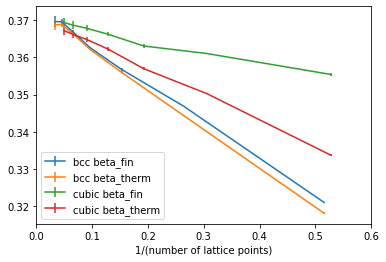

In [25]:
# Plot as a function of number of points 
plt.errorbar(66/(2*L_bcc**3), beta_fin_bcc[:,0], yerr=beta_fin_bcc[:,1],label='bcc beta_fin')
plt.errorbar(66/(2*L_bcc**3), beta_therm_bcc[:,0], yerr=beta_therm_bcc[:,1],label='bcc beta_therm')
plt.errorbar(66/L_cubic**3, beta_fin_cubic[:,0], yerr=beta_fin_cubic[:,1],label='cubic beta_fin')
plt.errorbar(66/L_cubic**3, beta_therm_cubic[:,0], yerr=beta_therm_cubic[:,1],label='cubic beta_therm')
plt.legend()
plt.xlim([0,0.6])
plt.xlabel('1/(number of lattice points)')

## Fitting the density dependence

### fitting functions

In [26]:
def Lfit_fn1(rho,c,a1,a2):
    return a1*rho+a2*rho**(2./3.)+c

def Lfit_fn2(rho,c,a1,a2):
    return a1*rho+a2*rho**(4./3.)+c

def Lfit_fn3(rho,c,a1,a2):
    return a1*rho+a2*rho**(1./3.)+c

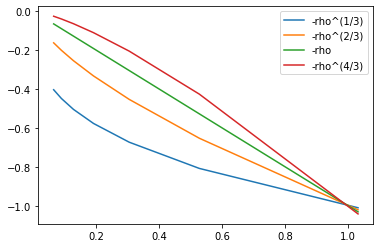

In [28]:
rho_bcc=66/(L_bcc**3)
plt.plot(rho_bcc,-rho_bcc**(1./3.),label='-rho^(1/3)')
plt.plot(rho_bcc,-rho_bcc**(2./3.),label='-rho^(2/3)' )
plt.plot(rho_bcc,-rho_bcc,label='-rho')
plt.plot(rho_bcc,-rho_bcc**(4./3),label='-rho^(4/3)')
plt.legend()

## Fitting of cubic results

beta_fin c=0.372383 +/- 0.001872
beta_fin c=0.370865 +/- 0.001211
beta_therm c=0.368251 +/- 0.001883
beta_therm c=0.369455 +/- 0.001083


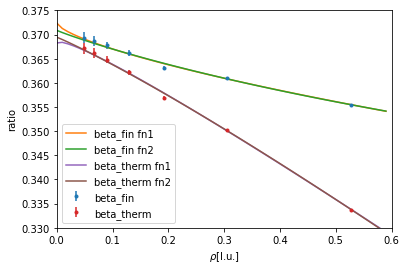

In [29]:
# Fitting rho dependence 
# cubic beta_fin 
rho_cubic=66/(L_cubic**3)
plt.errorbar(rho_cubic,beta_fin_cubic[:,0],yerr=beta_fin_cubic[:,1], fmt='.', label='beta_fin')
# fit function 1
params, p_covariance = optimize.curve_fit(Lfit_fn1, rho_cubic, 
                                beta_fin_cubic[:,0], sigma=beta_fin_cubic[:,1],
                                p0=[0.37, -0.01,-0.01])
print('beta_fin c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
xx = np.arange(0,0.6,0.01)
ff = Lfit_fn1(xx,*params)
plt.plot(xx,ff,label='beta_fin fn1'  )
# fit function 2
params, p_covariance = optimize.curve_fit(Lfit_fn2, rho_cubic, 
                                beta_fin_cubic[:,0], sigma=beta_fin_cubic[:,1],
                                p0=[0.37, -0.01,-0.01])
print('beta_fin c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
xx = np.arange(0,0.6,0.01)
ff = Lfit_fn2(xx,*params)
plt.plot(xx,ff,label='beta_fin fn2'  )

# cubic beta_therm 
plt.errorbar(rho_cubic,beta_therm_cubic[:,0],yerr=beta_therm_cubic[:,1], fmt='.', label='beta_therm')
# fit function 1
params, p_covariance = optimize.curve_fit(Lfit_fn1, rho_cubic, 
                                beta_therm_cubic[:,0], sigma=beta_therm_cubic[:,1],
                                p0=[0.37, -0.01,-0.01])
print('beta_therm c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
xx = np.arange(0,0.6,0.01)
ff = Lfit_fn1(xx,*params)
plt.plot(xx,ff,label='beta_therm fn1'  )
# fit function 2
params, p_covariance = optimize.curve_fit(Lfit_fn2, rho_cubic, 
                                beta_therm_cubic[:,0], sigma=beta_therm_cubic[:,1],
                                p0=[0.37, -0.01,-0.01])
print('beta_therm c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
xx = np.arange(0,0.6,0.01)
ff = Lfit_fn2(xx,*params)
plt.plot(xx,ff,label='beta_therm fn2'  )

plt.legend()
plt.xlim([0,0.6])
plt.ylim([0.33,0.375])
plt.ylabel('ratio')
plt.xlabel(r'$\rho$[l.u.]')
plt.legend()

## Fitting of BCC results with fitting function 1

beta_fin c=0.371392 +/- 0.001659
beta_therm c=0.374205 +/- 0.000720


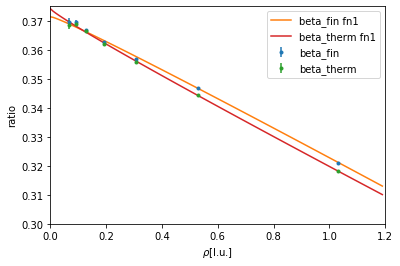

In [34]:
# Fitting rho dependence 
# bcc beta_fin 
rho_bcc=66/(L_bcc**3)
dat_x=rho_bcc[:]
dat_y=beta_fin_bcc[:,0]
dat_yerr=beta_fin_bcc[:,1]
plt.errorbar(rho_bcc,beta_fin_bcc[:,0],yerr=beta_fin_bcc[:,1], fmt='.', label='beta_fin')
xx = np.arange(0,1.2,0.01)

# fit function 1
params, p_covariance = optimize.curve_fit(Lfit_fn1, dat_x, dat_y, sigma=dat_yerr,
                                p0=[0.37, -0.01,-0.01])
print('beta_fin c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )

ff = Lfit_fn1(xx,*params)
plt.plot(xx,ff,label='beta_fin fn1'  )

# bcc beta_therm 
dat_x=rho_bcc[:]
dat_y=beta_therm_bcc[:,0]
dat_yerr=beta_therm_bcc[:,1]
plt.errorbar(rho_bcc,beta_therm_bcc[:,0],yerr=beta_therm_bcc[:,1], fmt='.', label='beta_therm')
# fit function 1
params, p_covariance = optimize.curve_fit(Lfit_fn1, dat_x,dat_y, sigma=dat_yerr,
                                p0=[0.37, -0.01,-0.01])
print('beta_therm c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
ff = Lfit_fn1(xx,*params)
plt.plot(xx,ff,label='beta_therm fn1'  )

plt.legend()
plt.xlim([0,1.2])
plt.ylim([0.30,0.375])
plt.ylabel('ratio')
plt.xlabel(r'$\rho$[l.u.]')
plt.legend()

## Fitting of BCC results with fitting function 2

beta_fin c=0.371988 +/- 0.000953
beta_therm c=0.373352 +/- 0.000463


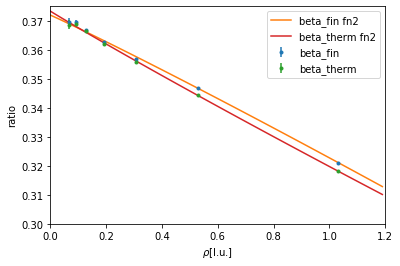

In [35]:
# Fitting rho dependence 
# bcc beta_fin 
rho_bcc=66/(L_bcc**3)
dat_x=rho_bcc[:]
dat_y=beta_fin_bcc[:,0]
dat_yerr=beta_fin_bcc[:,1]
plt.errorbar(rho_bcc,beta_fin_bcc[:,0],yerr=beta_fin_bcc[:,1], fmt='.', label='beta_fin')
xx = np.arange(0,1.2,0.01)

# fit function 2
params, p_covariance = optimize.curve_fit(Lfit_fn2, dat_x,dat_y, sigma=dat_yerr,
                                p0=[0.37, -0.01,-0.01])
print('beta_fin c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
ff = Lfit_fn2(xx,*params)
plt.plot(xx,ff,label='beta_fin fn2'  )

# bcc beta_therm 
dat_x=rho_bcc[:]
dat_y=beta_therm_bcc[:,0]
dat_yerr=beta_therm_bcc[:,1]
plt.errorbar(rho_bcc,beta_therm_bcc[:,0],yerr=beta_therm_bcc[:,1], fmt='.', label='beta_therm')
# fit function 2
params, p_covariance = optimize.curve_fit(Lfit_fn2, dat_x,dat_y, sigma=dat_yerr,
                                p0=[0.37, -0.01,-0.01])
print('beta_therm c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
ff = Lfit_fn2(xx,*params)
plt.plot(xx,ff,label='beta_therm fn2'  )

plt.legend()
plt.xlim([0,1.2])
plt.ylim([0.30,0.375])
plt.ylabel('ratio')
plt.xlabel(r'$\rho$[l.u.]')
plt.legend()

## Fitting of BCC results with fitting function 3

beta_fin c=0.370185 +/- 0.003187
beta_therm c=0.375970 +/- 0.001293


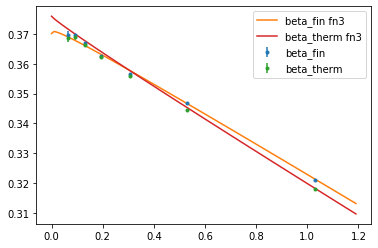

In [37]:
# Fitting rho dependence 
# bcc beta_fin 
rho_bcc=66/(L_bcc**3)
dat_x=rho_bcc[:]
dat_y=beta_fin_bcc[:,0]
dat_yerr=beta_fin_bcc[:,1]
plt.errorbar(rho_bcc,beta_fin_bcc[:,0],yerr=beta_fin_bcc[:,1], fmt='.', label='beta_fin')
xx = np.arange(0,1.2,0.01)
# fit function 1
params, p_covariance = optimize.curve_fit(Lfit_fn3, dat_x, dat_y, sigma=dat_yerr,
                                p0=[0.37, 0.01, 0.01])
print('beta_fin c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )

ff = Lfit_fn3(xx,*params)
plt.plot(xx,ff,label='beta_fin fn3'  )

# bcc beta_therm 
dat_x=rho_bcc[:]
dat_y=beta_therm_bcc[:,0]
dat_yerr=beta_therm_bcc[:,1]
plt.errorbar(rho_bcc,beta_therm_bcc[:,0],yerr=beta_therm_bcc[:,1], fmt='.', label='beta_therm')
# fit function 1
params, p_covariance = optimize.curve_fit(Lfit_fn3, dat_x,dat_y, sigma=dat_yerr,
                                p0=[0.37, -0.01,-0.01])
print('beta_therm c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
ff = Lfit_fn1(xx,*params)
plt.plot(xx,ff,label='beta_therm fn3'  )

plt.legend()